## 1.1.1 Пример
> Проведем кластеризацию K-средних к набору простых цифр. K-means попытается идентифицировать похожие цифры

In [1]:
# Начнём с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
# выполним кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

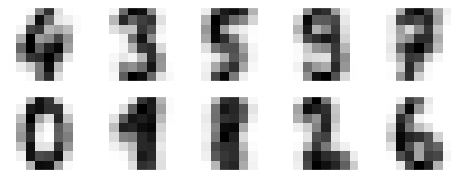

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Задание 1.1.1.
> Дан массив данных

> X = np. array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])

> Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

## Задание 1.1.2.
>Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

## 1.1.2 Пример
> Построить дендрограмму для заданного массива данных.

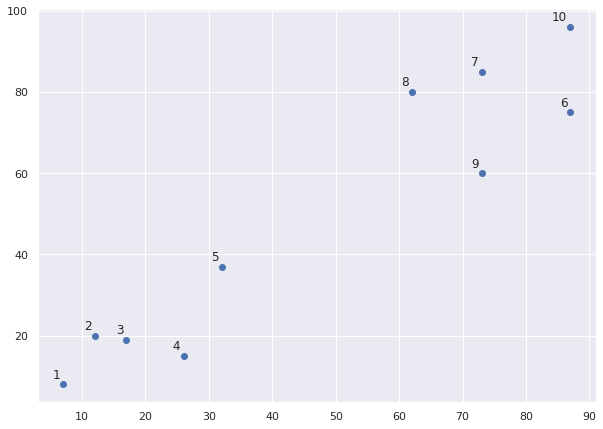

In [4]:
X = np.array(
    [[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],[62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

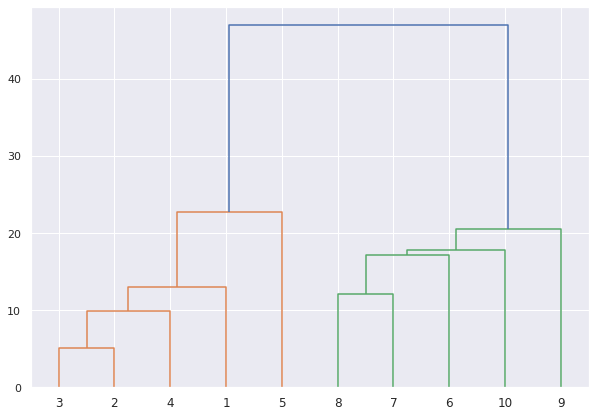

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10,7))
dendrogram(linked, orientation = 'top', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)
plt.show()

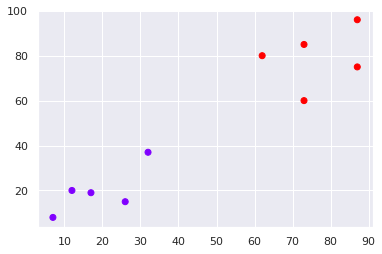

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = cluster.labels_, cmap='rainbow')

## Пример 1.1.3.
> В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как ее можно использовать для решения реальной проблемы. Выполним кластеризацию данных по набору

> https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

> Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.

In [7]:
# импортируем библиотеки
import pandas as pd
url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


> Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [8]:
data = customer_data.iloc[:, 3:5].values

> Далее нам нужно знать кластеры, на которые мы хотим разделить наши данные. Мы снова будем использовать библиотеку scipy для создания дендрограммы:

<Figure size 5040x2160 with 0 Axes>

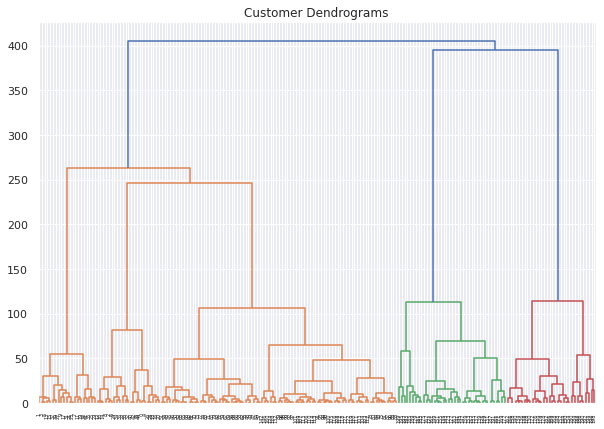

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

> Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров.

> Для этого мы снова воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster.

In [10]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

> В качестве последнего шага давайте построим кластеры, чтобы увидеть, как на самом деле были сгруппированы наши данные:

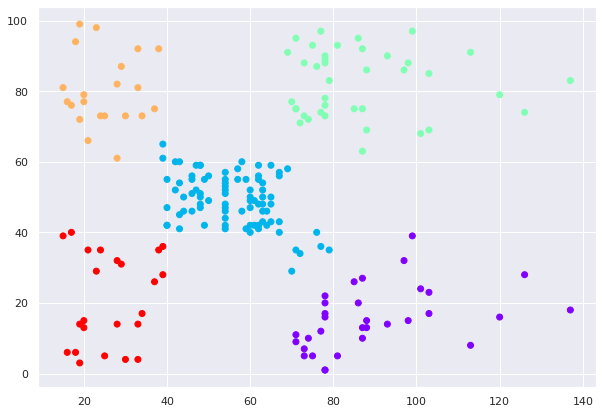

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## Задача 1.1.3.
> Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).